## Importar bibliotecas necesarias

In [31]:
import pandas as pd
import seaborn as sns
from seaborn import scatterplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Cargar el dataset

In [32]:
# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(r'C:\Users\ahmed\Desktop\AI&DataScience\Scikit-learn\Data\Pokemon.csv')

## Explorar el datset

In [33]:
# Visualizar las diez primeras filas del dataset
df.head()

,Name,Type 1,Type 2,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1


In [34]:
# Visualizar las diez últimas filas del dataframe
df.tail()

,Name,Type 1,Type 2,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation
51,Paras,Bug,Grass,285,35,70,55,45,55,25,1
52,Parasect,Bug,Grass,405,60,95,80,60,80,30,1
53,Venonat,Bug,Poison,305,60,55,50,40,55,45,1
54,Venomoth,Bug,Poison,450,70,65,60,90,75,90,1
55,Diglett,Ground,NaN,265,10,55,25,35,45,95,1


In [35]:
# Tamaño del dataset
df.shape

(56, 11)

In [36]:
# Mirar los nombres de Pokemons existentes
df['Name']

0                     Bulbasaur
1                       Ivysaur
2                      Venusaur
3         VenusaurMega Venusaur
4                    Charmander
5                    Charmeleon
6                     Charizard
7     CharizardMega Charizard X
8     CharizardMega Charizard Y
9                      Squirtle
10                    Wartortle
11                    Blastoise
12      BlastoiseMega Blastoise
13                     Caterpie
14                      Metapod
15                   Butterfree
16                       Weedle
17                       Kakuna
18                     Beedrill
19        BeedrillMega Beedrill
20                       Pidgey
21                    Pidgeotto
22                      Pidgeot
23          PidgeotMega Pidgeot
24                      Rattata
25                     Raticate
26                      Spearow
27                       Fearow
28                        Ekans
29                        Arbok
30                      Pikachu
31      

In [37]:
# Mirar los tipos de Pokemons existentes
# Obtener los tipos únicos de las columnas 'Type 1' y 'Type 2'
tipos = pd.unique(df[['Type 1', 'Type 2']].values.ravel())

# Mostrar los tipos únicos
print(tipos)

['Grass' 'Poison' 'Fire' nan 'Flying' 'Dragon' 'Water' 'Bug' 'Normal'
 'Electric' 'Ground' 'Fairy']


In [38]:
# Estadísticas básicas del dataset
df.describe(include='all')

,Name,Type 1,Type 2,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation
count,56,56,31,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
unique,56,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bulbasaur,Bug,Poison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,11,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,390.714286,61.875000,69.196429,61.785714,65.142857,64.982143,67.732143,1.0
std,NaN,NaN,NaN,119.781728,21.734817,24.774928,23.425483,32.938747,24.795521,26.458538,0.0
min,NaN,NaN,NaN,195.000000,10.000000,20.000000,20.000000,15.000000,20.000000,20.000000,1.0
25%,NaN,NaN,NaN,296.250000,45.000000,51.500000,43.750000,40.000000,50.000000,45.000000,1.0
50%,NaN,NaN,NaN,395.000000,60.000000,65.000000,57.500000,60.000000,65.000000,65.000000,1.0
75%,NaN,NaN,NaN,483.500000,75.750000,83.250000,77.250000,85.000000,80.000000,86.250000,1.0


In [39]:
#Información sobre nulos
df.isnull().sum()

Name              0
Type 1            0
Type 2           25
Total Point       0
Health Point      0
Attack Point      0
Defense Point     0
Sp. Atk Point     0
Sp. Def Point     0
Speed Point       0
Generation        0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           56 non-null     object
 1   Type 1         56 non-null     object
 2   Type 2         31 non-null     object
 3   Total Point    56 non-null     int64 
 4   Health Point   56 non-null     int64 
 5   Attack Point   56 non-null     int64 
 6   Defense Point  56 non-null     int64 
 7   Sp. Atk Point  56 non-null     int64 
 8   Sp. Def Point  56 non-null     int64 
 9   Speed Point    56 non-null     int64 
 10  Generation     56 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 4.9+ KB


## Rellenar valores faltantes

In [41]:
# Seleccionar columnas cuyo tipo de datos sea 'float64' o 'int64'(Númericas)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# La variable 'numeric_cols' ahora contiene los nombres de las columnas que tienen tipos de datos 'float64' o 'int64'
numeric_cols

Index(['Total Point', 'Health Point', 'Attack Point', 'Defense Point',
       'Sp. Atk Point', 'Sp. Def Point', 'Speed Point', 'Generation'],
      dtype='object')

In [42]:
# Seleccionar columnas cuyo tipo de datos sea 'object' o 'category'()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# La variable 'categorical_cols' ahora contiene los nombres de las columnas que tienen tipos de datos 'object' o 'category'
categorical_cols

Index(['Name', 'Type 1', 'Type 2'], dtype='object')

In [43]:
# Crear un imputador para valores numéricos utilizando la mediana como estrategia de imputación
imputer_num = SimpleImputer(strategy='median')

# Aplicar la imputación a las columnas numéricas del DataFrame
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

In [44]:
# Crear un imputador SimpleImputer para valores categóricos utilizando la estrategia 'most_frequent' (más frecuente)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Aplicar la imputación a las columnas categóricas del DataFrame
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [45]:
#Comprovar la información sobre nulos
print(df.isnull().sum())

Name             0
Type 1           0
Type 2           0
Total Point      0
Health Point     0
Attack Point     0
Defense Point    0
Sp. Atk Point    0
Sp. Def Point    0
Speed Point      0
Generation       0
dtype: int64


 ## Encoding

In [46]:
# Aplicar codificación a las variables categóricas en el DataFrame
df_dummies = pd.get_dummies(df, drop_first=True)

df_dummies.head()

,Total Point,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation,Name_Beedrill,Name_BeedrillMega Beedrill,...,Type 1_Grass,Type 1_Ground,Type 1_Normal,Type 1_Poison,Type 1_Water,Type 2_Fairy,Type 2_Flying,Type 2_Grass,Type 2_Ground,Type 2_Poison
0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total Point                     56 non-null     float64
 1   Health Point                    56 non-null     float64
 2   Attack Point                    56 non-null     float64
 3   Defense Point                   56 non-null     float64
 4   Sp. Atk Point                   56 non-null     float64
 5   Sp. Def Point                   56 non-null     float64
 6   Speed Point                     56 non-null     float64
 7   Generation                      56 non-null     float64
 8   Name_Beedrill                   56 non-null     uint8  
 9   Name_BeedrillMega Beedrill      56 non-null     uint8  
 10  Name_Blastoise                  56 non-null     uint8  
 11  Name_BlastoiseMega Blastoise    56 non-null     uint8  
 12  Name_Bulbasaur                  56 non

## EDA

Visualización univariante

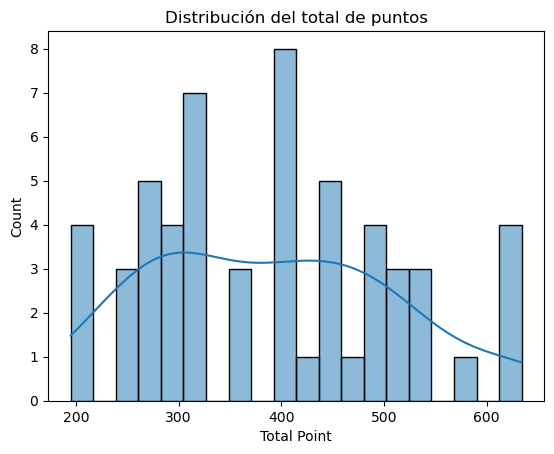

In [48]:
sns.histplot(df_dummies['Total Point'], bins=20, kde=True)
plt.title('Distribución del total de puntos')
plt.show()

Visualización multivariante

<Figure size 800x700 with 0 Axes>

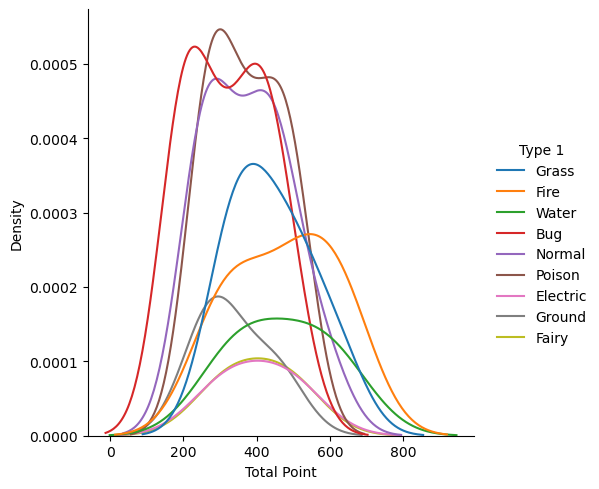

In [49]:
# Crear un gráfico de densidad (KDE) para la columna "Total point", diferenciando por la categoría "Type 1"
plt.figure(figsize=(8,7))
sns.displot(df, x="Total Point", hue="Type 1", kind="kde")
plt.show()

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x700 with 0 Axes>

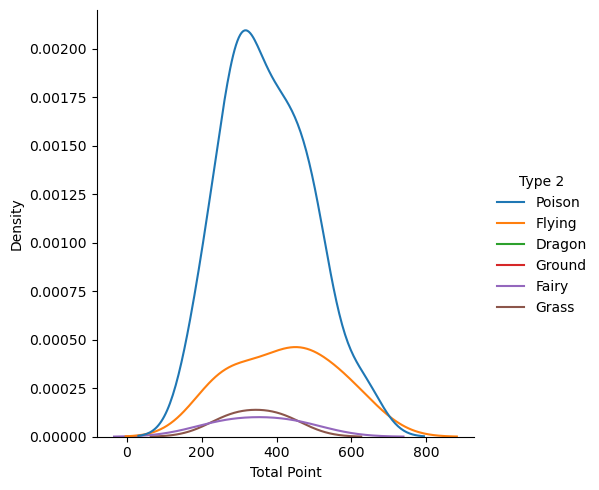

In [50]:
# Crear un gráfico de densidad (KDE) para la columna "Total point", diferenciando por la categoría "Type 2"
plt.figure(figsize=(8,7))
sns.displot(df, x="Total Point", hue="Type 2", kind="kde")
plt.show()

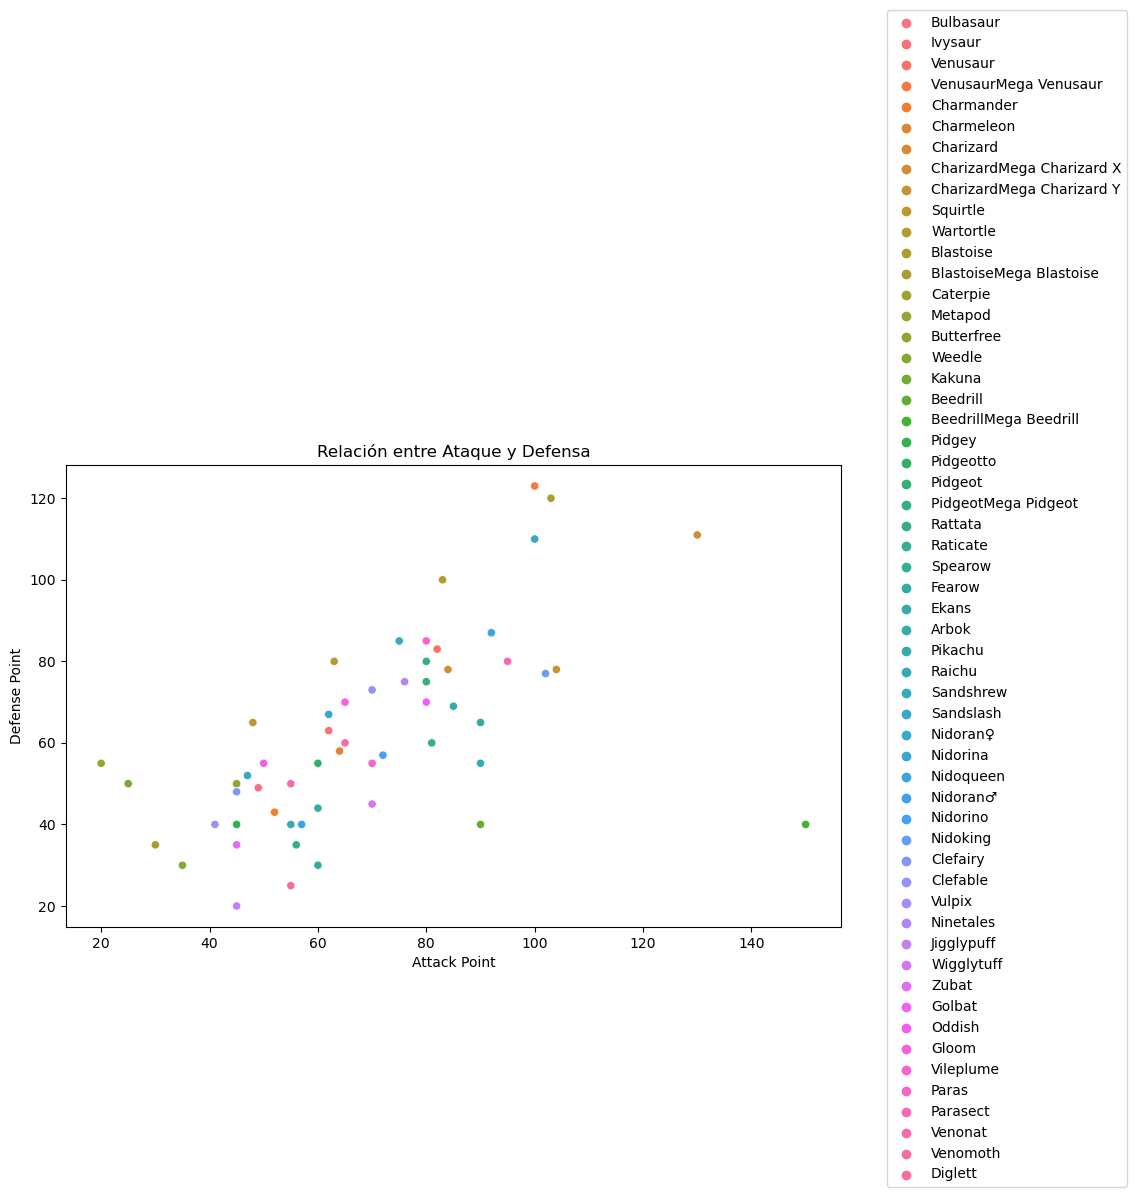

In [51]:
# Visualización de la relación entre ataque y defensa por nombre
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Attack Point', y='Defense Point', hue='Name')
# Ajustar la posición de la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 2), loc='upper left')
plt.title('Relación entre Ataque y Defensa')
plt.show()

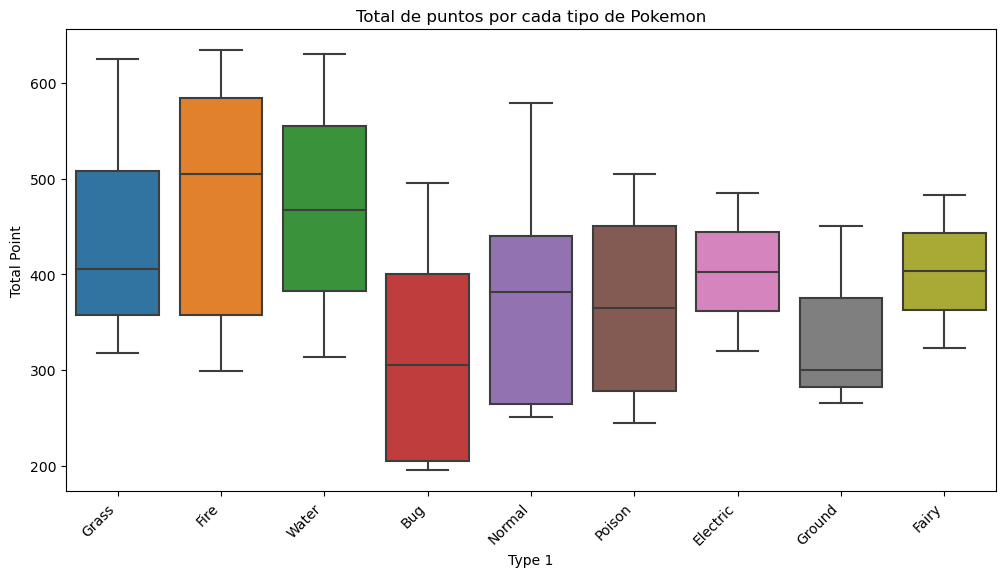

In [52]:
# Visualización de la distribución del total de puntos por cada tipo de Pokemon
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type 1', y='Total Point')
plt.title('Total de puntos por cada tipo de Pokemon')
plt.xticks(rotation=45, ha='right')
plt.show()

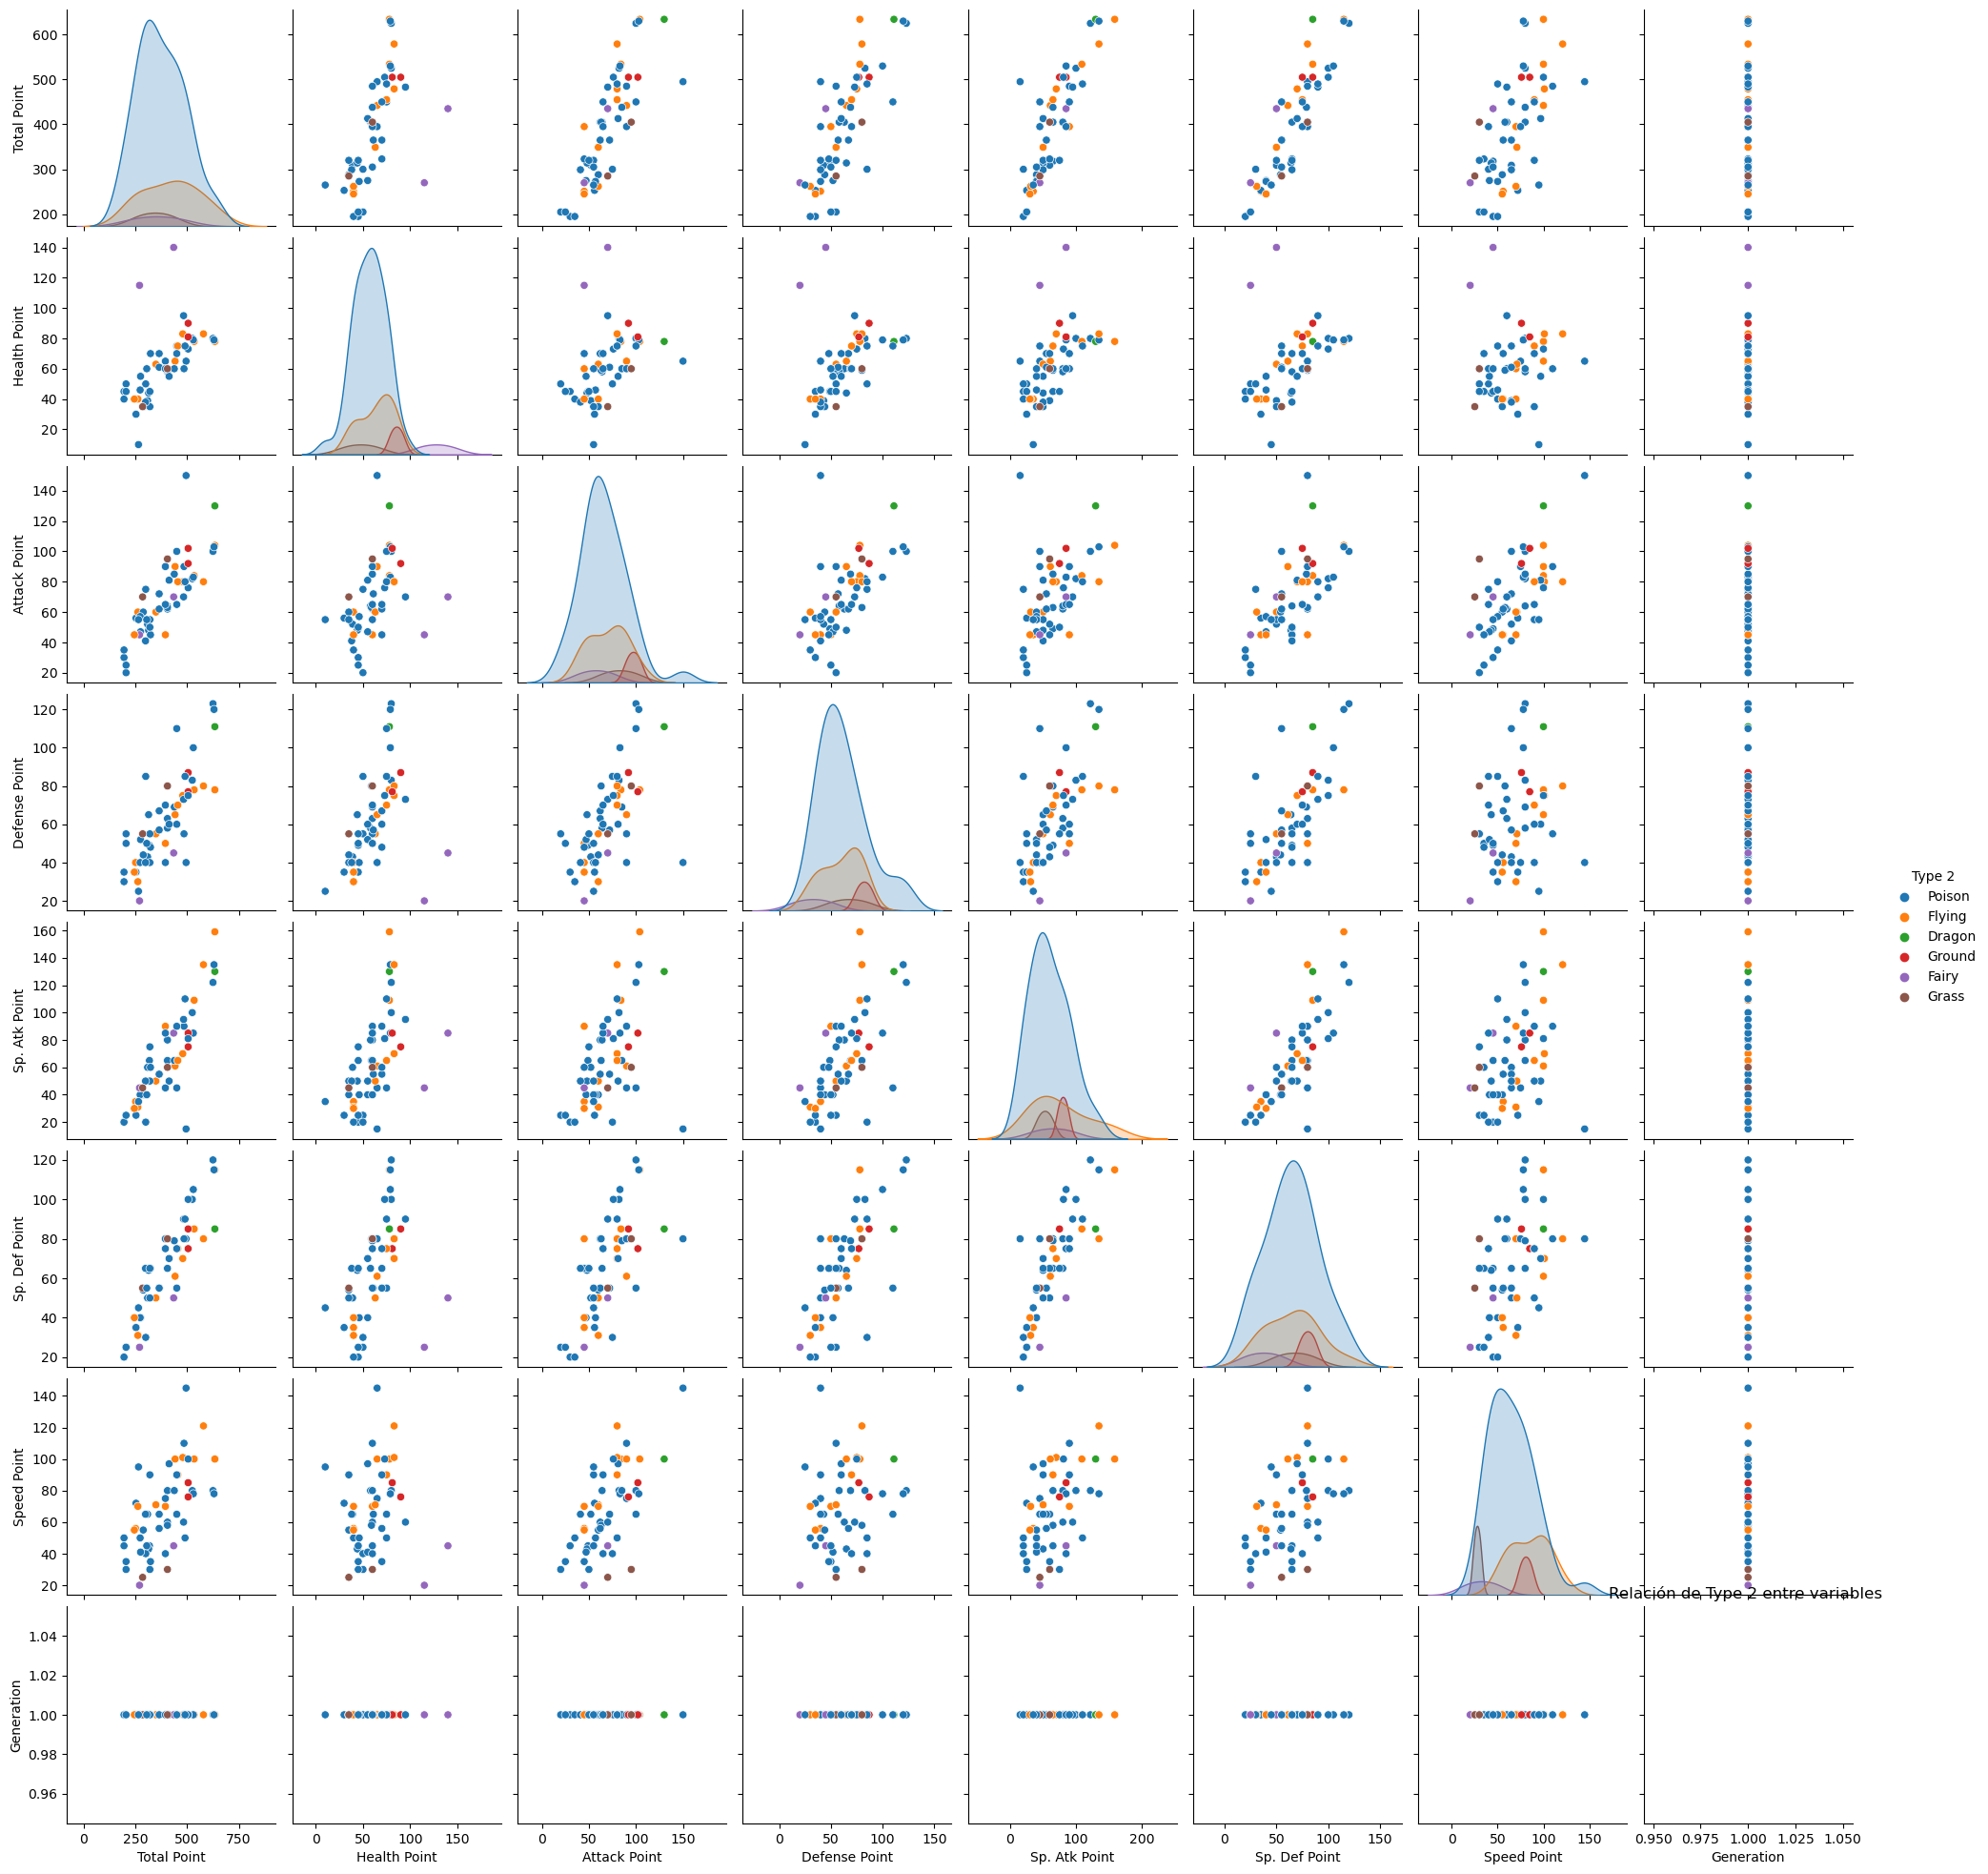

In [53]:
sns.pairplot(df, hue='Type 2')
plt.title('Relación de Type 2 entre variables ')
plt.show()

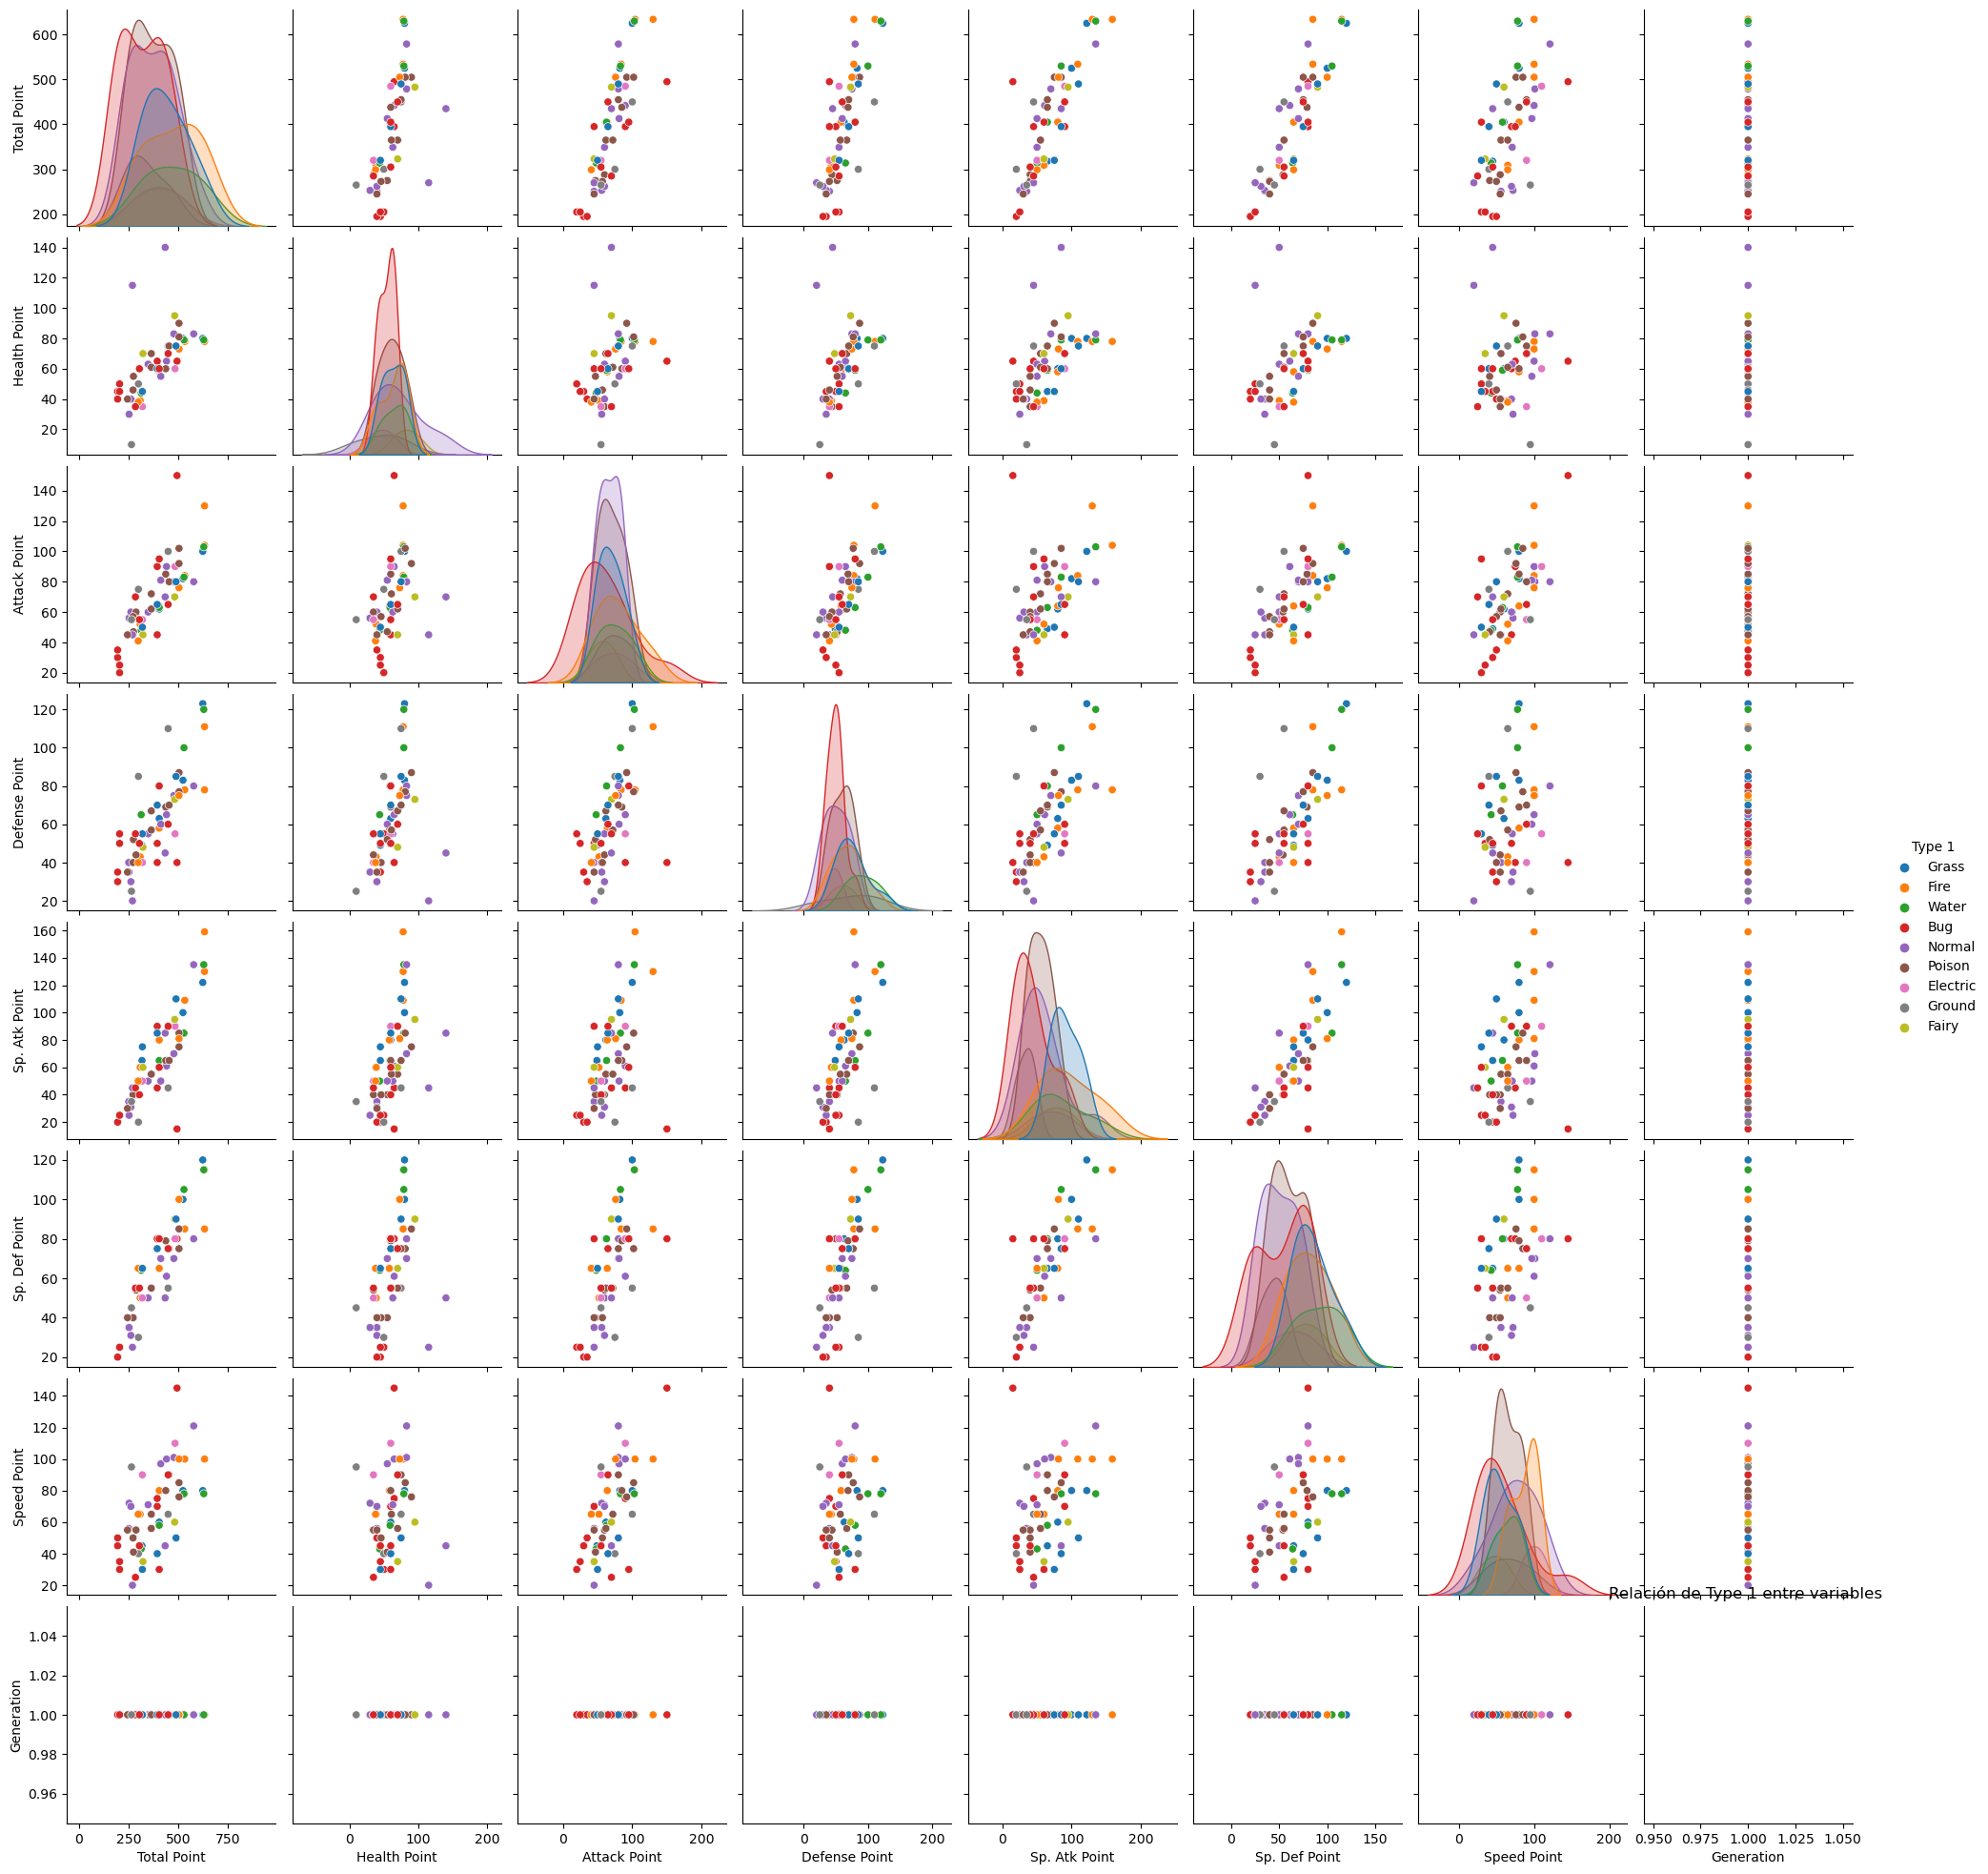

In [54]:
sns.pairplot(df, hue='Type 1')
plt.title('Relación de Type 1 entre variables ')
plt.show()

In [55]:
# Crear un mapa de calor de la correlación entre variables numéricas
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis", fmt=".2f")
plt.suptitle("Correlación entre variables", y=1.02)


TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 800x700 with 0 Axes>

## Crear un modelo de regresión con scikit-learn

In [ ]:
# Preparación de X e Y
X = df_dummies.drop('Total Point', axis=1)
y = df_dummies['Total Point']


In [ ]:
X.head()

,Health Point,Attack Point,Defense Point,Sp. Atk Point,Sp. Def Point,Speed Point,Generation,Name_Beedrill,Name_BeedrillMega Beedrill,Name_Blastoise,...,Type 1_Grass,Type 1_Ground,Type 1_Normal,Type 1_Poison,Type 1_Water,Type 2_Fairy,Type 2_Flying,Type 2_Grass,Type 2_Ground,Type 2_Poison
0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,39.0,52.0,43.0,60.0,50.0,65.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Particionamiento del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Realizar predicciones en el conjunto de prueba

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

## Evaluar el modelo

In [ ]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas calculadas
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Absolute Error: 0.0019315479417916965
Mean Squared Error: 5.555205556538209e-06
R^2 Score: 0.9999999996886981
